In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
edu_data = pd.read_csv('edu_cleaned.csv')
gdp_data = pd.read_csv('gdp_cleaned.csv')

In [3]:
edu_data.head()

,Country Name,Country Code,Year,Value
0,Antigua and Barbuda,ATG,2016,2.251775
1,"Bahamas, The",BHS,2016,2.586607
2,Belize,BLZ,2016,5.721710
3,Bermuda,BMU,2016,1.915444
4,Barbados,BRB,2016,4.683830


In [4]:
gdp_data.head()

,Country Name,Country Code,Year,Value
0,Antigua and Barbuda,ATG,2016,4.099766
1,"Bahamas, The",BHS,2016,-0.961909
2,Belize,BLZ,2016,0.054552
3,Bermuda,BMU,2016,-0.657206
4,Barbados,BRB,2016,1.791930


In [5]:
edu_data.dropna(inplace=True)
gdp_data.dropna(inplace=True)

In [6]:
edu_data.shape

(129, 4)

In [7]:
gdp_data.shape

(140, 4)

In [8]:
gdp_data['Country Name'].value_counts()

Antigua and Barbuda    7
Bahamas, The           7
Trinidad and Tobago    7
El Salvador            7
Panama                 7
Nicaragua              7
Mexico                 7
Jamaica                7
Haiti                  7
Honduras               7
Guatemala              7
Grenada                7
Dominican Republic     7
Cuba                   7
Costa Rica             7
Canada                 7
Barbados               7
Bermuda                7
Belize                 7
United States          7
Name: Country Name, dtype: int64

In [9]:
edu_data['Country Name'].value_counts()

Antigua and Barbuda    7
Guatemala              7
Trinidad and Tobago    7
El Salvador            7
Panama                 7
Nicaragua              7
Jamaica                7
Haiti                  7
Bahamas, The           7
Honduras               7
Dominican Republic     7
Canada                 7
Barbados               7
Bermuda                7
Belize                 7
Costa Rica             6
United States          6
Mexico                 5
Grenada                4
Cuba                   3
Name: Country Name, dtype: int64

In [10]:
combined_data = pd.merge(edu_data, gdp_data, on=['Country Name', 'Country Code', 'Year'], suffixes=('_edu', '_gdp'))
combined_data.head()

,Country Name,Country Code,Year,Value_edu,Value_gdp
0,Antigua and Barbuda,ATG,2016,2.251775,4.099766
1,"Bahamas, The",BHS,2016,2.586607,-0.961909
2,Belize,BLZ,2016,5.721710,0.054552
3,Bermuda,BMU,2016,1.915444,-0.657206
4,Barbados,BRB,2016,4.683830,1.791930


In [11]:
combined_data.tail()

,Country Name,Country Code,Year,Value_edu,Value_gdp
124,Jamaica,JAM,2022,5.354350,5.221520
125,Nicaragua,NIC,2022,3.794763,3.752285
126,Panama,PAN,2022,3.366930,10.769666
127,El Salvador,SLV,2022,3.256340,2.799552
128,Trinidad and Tobago,TTO,2022,2.879704,1.482235


In [12]:
combined_data.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value_edu       0
Value_gdp       0
dtype: int64

In [13]:
#combined_data[combined_data['Value_gdp'] < 0].head()

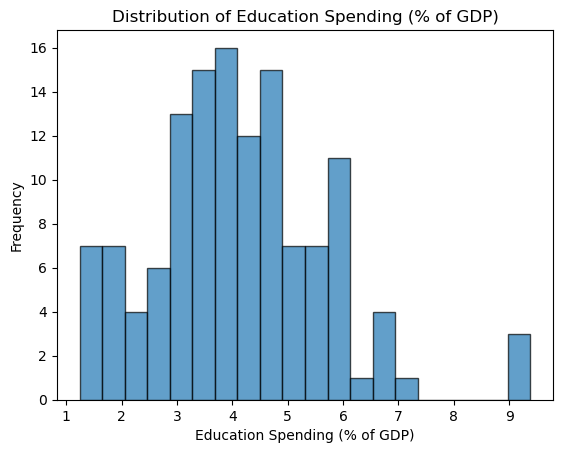

In [14]:
plt.hist(combined_data['Value_edu'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Education Spending (% of GDP)')
plt.xlabel('Education Spending (% of GDP)')
plt.ylabel('Frequency')
plt.show()

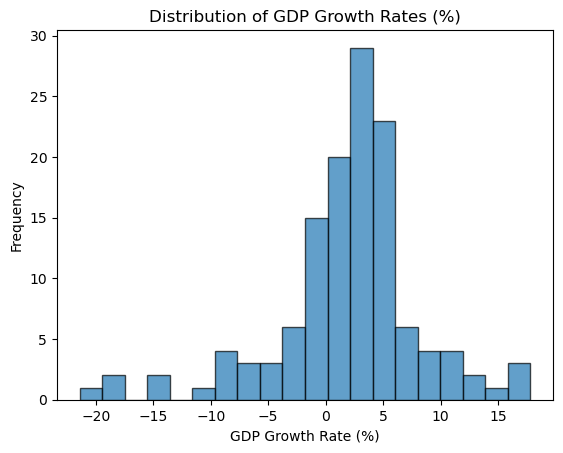

In [15]:
plt.hist(combined_data['Value_gdp'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of GDP Growth Rates (%)')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Frequency')
plt.show()

In [16]:
correlation = combined_data['Value_edu'].corr(combined_data['Value_gdp'])
print("Correlation between Education Spending and GDP Growth:", correlation)

Correlation between Education Spending and GDP Growth: -0.010350948000866094


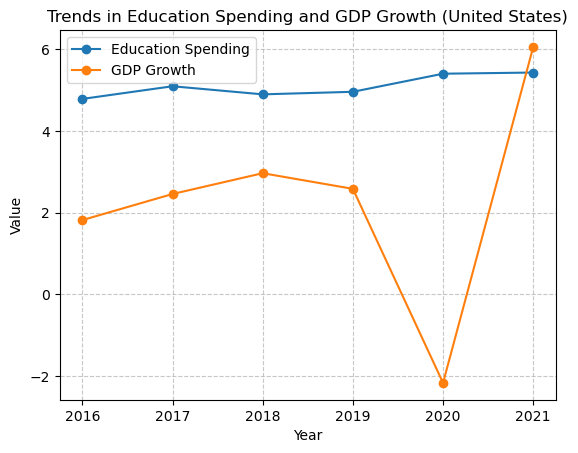

In [17]:
# Filter the data for the United States
country_data = combined_data[combined_data['Country Name'] == 'United States']

# Plot education spending with dots
plt.plot(country_data['Year'], country_data['Value_edu'], marker='o', label='Education Spending')

# Plot GDP growth with dots
plt.plot(country_data['Year'], country_data['Value_gdp'], marker='o', label='GDP Growth')

# Add title and labels
plt.title('Trends in Education Spending and GDP Growth (United States)')
plt.xlabel('Year')
plt.ylabel('Value')

# Add a legend
plt.legend()

# Show the plot
plt.grid(axis='both', linestyle='--', alpha=0.7)  # Optional: Add grid for clarity
plt.show()


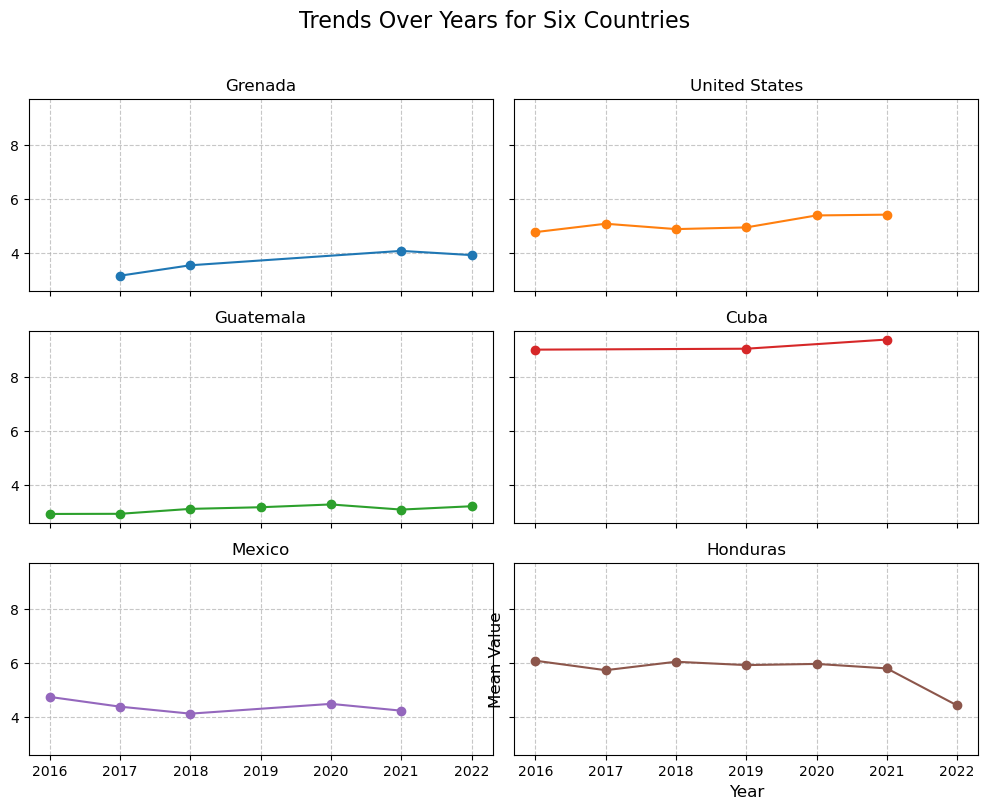

In [18]:
random_countries = random.sample(edu_data['Country Name'].unique().tolist(), 6)

filtered_data = edu_data[edu_data['Country Name'].isin(random_countries)]

fig, axes = plt.subplots(3, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()

colors = plt.cm.tab10.colors  # Use a built-in Matplotlib colormap

for i, country in enumerate(random_countries):
    country_data = filtered_data[filtered_data['Country Name'] == country]
    axes[i].plot(
        country_data['Year'], 
        country_data['Value'], 
        marker='o', 
        color=colors[i % len(colors)]  # Assign a unique color
    )
    axes[i].set_title(country, fontsize=12)
    axes[i].grid(axis='both', linestyle='--', alpha=0.7)

# Adjust layout
fig.suptitle('Trends Over Years for Six Countries', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.show()


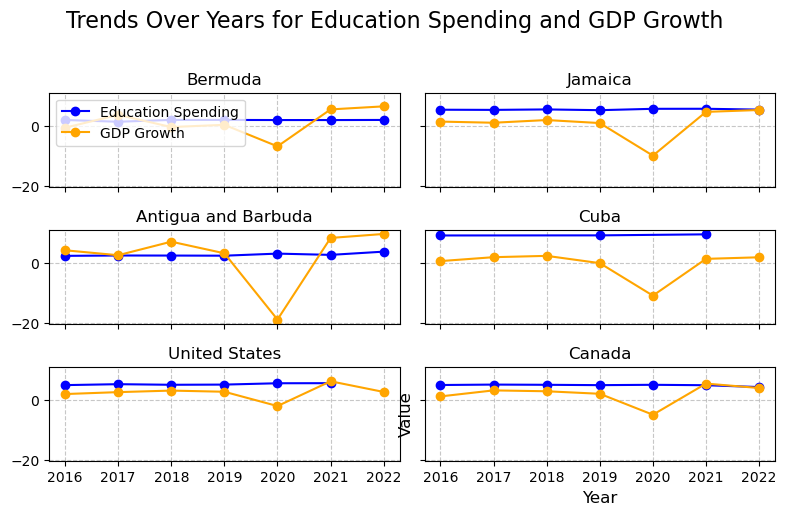

In [19]:
random_countries = random.sample(edu_data['Country Name'].unique().tolist(), 6)

filtered_edu_data = edu_data[edu_data['Country Name'].isin(random_countries)]
filtered_gdp_data = gdp_data[gdp_data['Country Name'].isin(random_countries)]

fig, axes = plt.subplots(3, 2, figsize=(8, 5), sharex=True, sharey=True)
axes = axes.flatten()

edu_color = 'blue'  # Color for education spending
gdp_color = 'orange'  # Color for GDP growth

for i, country in enumerate(random_countries):
    # Filter data for the current country
    edu_country_data = filtered_edu_data[filtered_edu_data['Country Name'] == country]
    gdp_country_data = filtered_gdp_data[filtered_gdp_data['Country Name'] == country]
    
    # Plot education spending trend
    axes[i].plot(
        edu_country_data['Year'], 
        edu_country_data['Value'], 
        marker='o', 
        color=edu_color, 
        label='Education Spending'
    )
    
    # Plot GDP growth trend
    axes[i].plot(
        gdp_country_data['Year'], 
        gdp_country_data['Value'], 
        marker='o', 
        color=gdp_color, 
        label='GDP Growth'
    )
    
    # Set title and grid for the subplot
    axes[i].set_title(country, fontsize=12)
    axes[i].grid(axis='both', linestyle='--', alpha=0.7)

axes[0].legend(loc='upper left', fontsize=10)

fig.suptitle('Trends Over Years for Education Spending and GDP Growth', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.xlabel('Year', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.show()


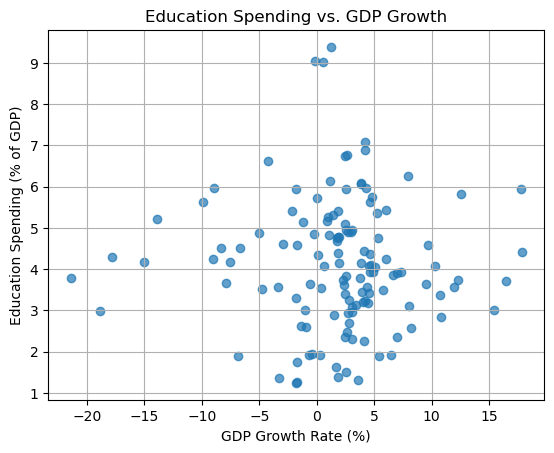

In [20]:
plt.scatter(combined_data['Value_gdp'], combined_data['Value_edu'], alpha=0.7)
plt.title('Education Spending vs. GDP Growth')
plt.xlabel('GDP Growth Rate (%)')
plt.ylabel('Education Spending (% of GDP)')
plt.grid(True)
plt.show()


In [21]:
combined_data.head()

,Country Name,Country Code,Year,Value_edu,Value_gdp
0,Antigua and Barbuda,ATG,2016,2.251775,4.099766
1,"Bahamas, The",BHS,2016,2.586607,-0.961909
2,Belize,BLZ,2016,5.721710,0.054552
3,Bermuda,BMU,2016,1.915444,-0.657206
4,Barbados,BRB,2016,4.683830,1.791930


In [22]:
cor = combined_data[['Value_edu','Value_gdp']]

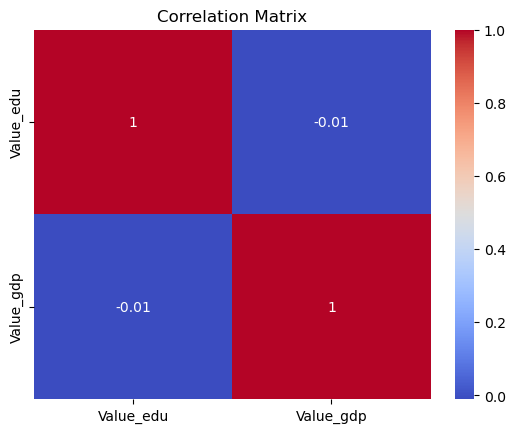

In [23]:
sns.heatmap(cor.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
